# Manifold Learning Techniques
![Mahdieh](./img/passport_photo.jpg)

Creator : *Mahdieh Alizadeh*
 
Email address: Mahdieh20201@gmail.com

Machine Learning 1403-fall


In manifold learning, we aim to uncover the low-dimensional structure embedded in high-dimensional data. Here, we discuss two popular methods: **Multidimensional Scaling (MDS)** and **Isomap**.

## 1. Multidimensional Scaling (MDS)

**Short Description**: MDS aims to preserve pairwise distances between data points by embedding them in a lower-dimensional space. This approach uses the concept of stress minimization to maintain distance relationships.

### Mathematical Formulation

The objective function for classical MDS is given by:

$
\text{minimize}_{\{y_i\}_{i=1}^n} c_1 = \sum_{i=1}^n \sum_{j=1}^n (x_i^T x_j - y_i^T y_j)^2,
$

whose matrix form is:

$
\text{minimize}_Y \, c_1 = \| X^T X - Y^T Y \|_F^2,
$

where $ (|\cdot\|_F)$ denotes the Frobenius norm.

The eigenvalue decomposition of the Gram matrix $( X^T X )$ is:

$
X^T X = V \Delta V^T, \quad Y^T Y = Q \Psi Q^T
$

The objective function can be simplified as:


$
\| X^T X - Y^T Y \|_F^2 = \text{tr}[(X^T X - Y^T Y)^T (X^T X - Y^T Y)] = \text{tr}[(X^T X - Y^T Y)(X^T X - Y^T Y)] = \text{tr}[(X^T X - Y^T Y)^2],
$

where $\text{tr}(\cdot)$ denotes the trace of the matrix. If $X^T X$ and $Y^T Y$ are decomposed using eigenvalue decomposition, the result is:

$
X^T X = V \Lambda V^T,
$

$
Y^T Y = Q \Psi Q^T,
$

where the eigenvectors are sorted from leading (largest eigenvalue) to trailing (smallest eigenvalue). Note that, rather than eigenvalue decomposition of $X^T X$ and $Y^T Y$, it is possible to decompose $X$ and $Y$ using a Singular Value Decomposition (SVD) and by taking the right singular vectors of $X$ and $Y$ as $V$ and $Q$, respectively.

 the matrices $\Delta$ and $\Psi$ are obtained by squaring the singular values (to power 2).

The objective function can be further simplified as:

$
\| X^T X - Y^T Y \|_F^2 = \text{tr}[(X^T X - Y^T Y)^2] = \text{tr}[(V \Delta V^T - Q \Psi Q^T)^2] = \text{tr}[(V \Delta V^T - V V^T Q \Psi Q^T V V^T)^2] = \text{tr}[(\Delta - V^T Q \Psi Q^T V)^2]
$

where these are for $V^T V = VV^T = I$ because $V$ is a nontruncated (square) orthogonal matrix (where $I$ denotes the identity matrix). The reason is the cyclic property of the trace operator. 

If $\mathbb{R}^{n \times n} \ni M := V^T Q$, then:

$
\| X^T X - Y^T Y \|_F^2 = \text{tr}[(\Delta - M \Psi M^T)^2].
$

Therefore:

$
\text{minimize}_Y \| X^T X - Y^T Y \|_F^2 = \text{minimize}_{M, Y} \text{tr}[(\Delta - M \Psi M^T)^2].
$

This means that the objective function is:

$
c_1 = \text{tr}[(\Delta - M \Psi M^T)^2] = \text{tr}(\Delta^2 + (M \Psi M^T)^2 - 2 \Delta M \Psi M^T) = \text{tr}(\Delta^2) + \text{tr}((M \Psi M^T)^2) - 2 \text{tr}(\Delta M \Psi M^T).
$
As the optimization problem is unconstrained and the objective function is the trace of a quadratic function, the minimum is nonnegative.

If the derivative with respect to the first objective variable, i.e., $M$, is taken, then the result is:

$
\mathbb{R}^{n \times n} \ni \frac{\partial c_1}{\partial M} = 2(M \Psi M^T) M - 2 \Delta M \Psi = 0 \Rightarrow (M \Psi M^T) (M) = (\Delta) (M \Psi M^T)
$

(a)

$
M \Psi M^T = \Delta,
$

where (a) is because $M \neq 0$. Both Eqs are:

$
M \Psi M^T = \Delta,
$

whose one possible solution is:

$
M = I,
$


$
\Psi = \Delta.
$

which means that the minimum value of the nonnegative objective function $\text{tr}((\Delta - M \Psi M^T)^2)$ is zero.

If there is $M = V^T Q$, there is:

$
\therefore V^T Q = I \Rightarrow Q = V.
$

there is:

$
Y^T Y = Q \Psi Q^T = Q \Psi^{\frac{1}{2}} Q^T Q \Psi^{\frac{1}{2}} Q^T \Rightarrow Y = \Psi^{\frac{1}{2}} Q^T.
$




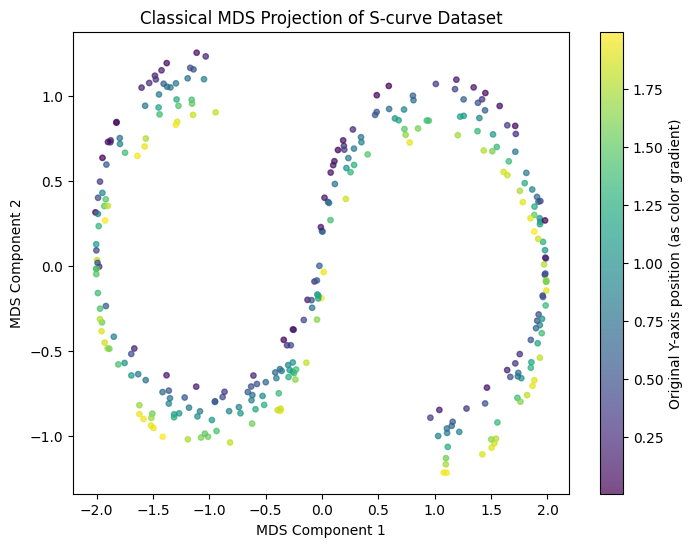

In [11]:
from sklearn.datasets import make_s_curve
from scipy.spatial.distance import pdist, squareform
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np


# Parameters
n_samples = 300
random_state = 0
embedding_dim = 2  # Target dimensionality for MDS

# Generate the S-curve dataset
S_points, _ = make_s_curve(n_samples, random_state=random_state)

# Compute the Euclidean distance matrix
D = squareform(pdist(S_points, metric='euclidean'))

# Centering matrix
n = D.shape[0]
H = np.eye(n) - np.ones((n, n)) / n

# Double centering the squared distance matrix
D_squared = D ** 2
B = -0.5 * H @ D_squared @ H

# Eigen decomposition of the centered matrix
eigenvalues, eigenvectors = np.linalg.eigh(B)

# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Select the top `embedding_dim` eigenvalues and eigenvectors
Lambda_m = np.diag(np.sqrt(eigenvalues[:embedding_dim]))
Q_m = eigenvectors[:, :embedding_dim]

# Compute the low-dimensional embedding
X_transformed = Q_m @ Lambda_m

# Plotting the result
plt.figure(figsize=(8, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=S_points[:, 1], cmap='viridis', s=15, alpha=0.7)
plt.colorbar(label="Original Y-axis position (as color gradient)")
plt.xlabel("MDS Component 1")
plt.ylabel("MDS Component 2")
plt.title("Classical MDS Projection of S-curve Dataset")
plt.show()


### Classical MDS Implementation on S-curve Dataset
This code applies Classical Multidimensional Scaling (MDS) to reduce a 3D S-curve dataset to 2D while preserving pairwise distances. It calculates the Euclidean distance matrix, centers the squared distances, and performs eigendecomposition to extract the top two eigenvalues and eigenvectors, forming a 2D embedding. The result is visualized with colors representing the original Y-axis values, capturing the S-curve structure in 2D.

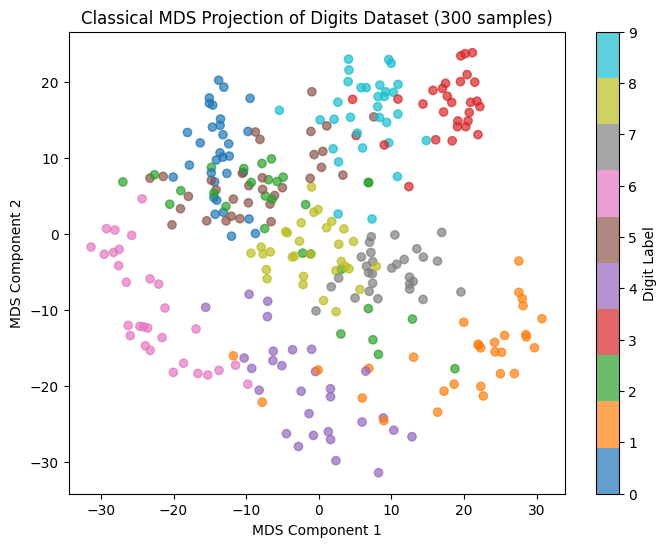

In [12]:

# Load digits dataset and select a subset of samples
x, y = load_digits(return_X_y=True)
samples = 300  # Number of samples to use
x_subset = x[:samples]
y_subset = y[:samples]

# Compute the Euclidean distance matrix for the subset
D = squareform(pdist(x_subset, metric='euclidean'))

# Centering matrix
n = D.shape[0]
H = np.eye(n) - np.ones((n, n)) / n

# Double-center the squared distance matrix
D_squared = D ** 2
B = -0.5 * H @ D_squared @ H

# Eigen decomposition of the centered matrix
eigenvalues, eigenvectors = np.linalg.eigh(B)

# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Select the top `m` eigenvalues and eigenvectors
m = 2  # Target dimensionality for MDS
Lambda_m = np.diag(np.sqrt(eigenvalues[:m]))  
Q_m = eigenvectors[:, :m]

# Compute the low-dimensional embedding
X_transformed = Q_m @ Lambda_m

# Plotting the result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_subset, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label="Digit Label")
plt.xlabel("MDS Component 1")
plt.ylabel("MDS Component 2")
plt.title("Classical MDS Projection of Digits Dataset (300 samples)")
plt.show()

### Classical MDS Implementation on digits Dataset
This code performs Classical Multidimensional Scaling (MDS) on a subset of the digits dataset, projecting high-dimensional data into 2D to maintain relative distances between samples. It first calculates pairwise Euclidean distances and uses a centering matrix to create a Gram matrix suitable for dimensionality reduction. After eigendecomposition, the top two components are selected to construct a 2D representation. The final visualization shows each digit as a color-coded point, highlighting patterns and clusters in the reduced space, which aids in understanding the dataset’s structure and relationships among digit samples.

## 2. Isometric Mapping (Isomap)

Isomap is a special case of the generalized classical MDS, where instead of using Euclidean distances, the geodesic distance is used:

$
D_{ij}^{(g)} = \min \sum_{i=2}^{l} \| r_i - r_{i-1} \|_2,
$

where $( l \geq 2 )$ is the length of the sequence of points $ ( r_i \in \{x_i\}_{i=1}^l )$, and $( D_{ij}^{(g)} )$ denotes the geodesic distance matrix.

Isomap's formulation involves a kernel matrix based on the geodesic distance:

$
K = -\frac{1}{2} H D^{(g)} H
$

where $( D^{(g)} )$ is the geodesic distance matrix, and $( H )$ is the centering matrix.


### ISOMAP on S-curve dataset
This code applies the **Isomap** algorithm to reduce a 3D S-curve dataset to **2D** while preserving its shape. 

1. **Calculate Distances** between all data points.
2. **Build Graph** by connecting each point to its closest `n_neighbors`.
3. **Compute Geodesic Distances** along the graph to approximate the manifold structure.
4. **Eigenvalue Decomposition** extracts the top features, yielding the final 2D embedding.

The result is a 2D plot showing the S-curve’s shape and continuity in reduced dimensions.

C:\Users\NovinAT\AppData\Local\Temp\ipykernel_21392\2956079821.py:30: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  eigvals, eigvecs = eigh(b, eigvals=(n - n_components, n - 1))  # Get largest n_components eigenvalues


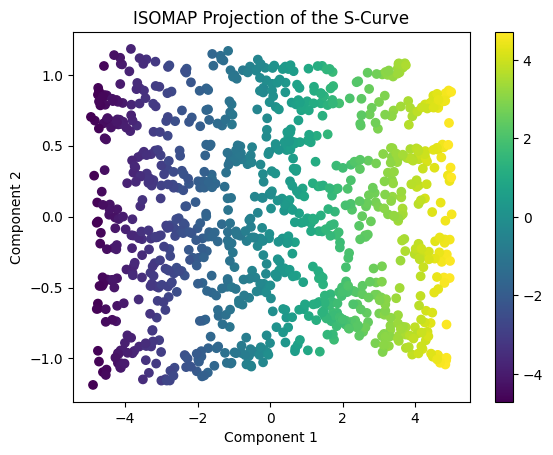

In [13]:
import numpy as np
from scipy.spatial import distance_matrix
from scipy.sparse.csgraph import shortest_path
from scipy.linalg import eigh
from sklearn.datasets import make_s_curve
import matplotlib.pyplot as plt

def isomap(data, n_neighbors=5, n_components=2):
    # Step 1: Compute the pairwise Euclidean distance matrix
    distances = distance_matrix(data, data)

    # Step 2: Build the neighborhood graph
    n_samples = data.shape[0]
    neighborhood_graph = np.full((n_samples, n_samples), np.inf)

    # Connect each point to its k nearest neighbors
    for i in range(n_samples):
        nearest_neighbors = np.argsort(distances[i])[:n_neighbors + 1]  # +1 includes the point itself
        neighborhood_graph[i, nearest_neighbors] = distances[i, nearest_neighbors]

    # Step 3: Compute shortest paths (geodesic distances)
    geodesic_distances = shortest_path(neighborhood_graph, method='D', directed=False)

    # Step 4: Double-center the geodesic distance matrix
    n = geodesic_distances.shape[0]
    h = np.eye(n) - np.ones((n, n)) / n
    b = -0.5 * h @ (geodesic_distances ** 2) @ h

    # Step 5: Compute the top eigenvalues and eigenvectors
    eigvals, eigvecs = eigh(b, eigvals=(n - n_components, n - 1))  # Get largest n_components eigenvalues
    indices = np.argsort(eigvals)[::-1]  # Sort in descending order
    eigvals, eigvecs = eigvals[indices], eigvecs[:, indices]

    # Step 6: Compute the coordinates in the reduced space
    embedding = eigvecs * np.sqrt(eigvals)

    return embedding[:, :n_components]

# Generate the S-curve dataset
data, color = make_s_curve(n_samples=1000, noise=0.05)

# Apply ISOMAP
reduced_data = isomap(data, n_neighbors=10, n_components=2)

# Plot the result
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=color, cmap='viridis')
plt.colorbar()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('ISOMAP Projection of the S-Curve')
plt.show()

### Kernel ISOMAP
Kernel Isomap extends the original by using kernel methods on the geodesic distance matrix:

$
K(D^2) = -\frac{1}{2} H D^2 H
$

And a modified kernel $( K' ) $ is defined as:

$
K' = K(D^2) + 2cK(D) + \frac{1}{c} H,
$

where $( c \geq c^* )$, and $( c^* )$ is the largest eigenvalue of the matrix:

$
\begin{bmatrix}
0 & 2K(D^2) \\
-4K(D^2) & 0
\end{bmatrix}.
$

For out-of-sample embedding, Isomap uses kernel mapping. Consider a mapping of any data point:

$
y(x) = \sum_{j=1}^{n} \alpha_j k(x, x_j),
$
where $( k(x, x_j) ) $ is a Gaussian kernel:

$
k(x, x_j) = \exp\left( -\frac{\| x - x_j \|^2}{2 \sigma_j^2} \right),
$

and $ ( \sigma_j )$ is defined as:

$
\sigma_j := \gamma \times \min_i \| x_j - x_i \|_2,
$

where $( \gamma )$ is a small positive number. The objective is to minimize the following cost function to obtain the out-of-sample points:

$
\text{minimize} \sum_{i=1}^{n} \| y_i - y(x_i) \|_2^2.
$

The corresponding kernel matrix is defined as:

$
K'(i,j) = \frac{k(x_i^{(t)}, x_j)}{\sum_{l=1}^{n} k(x_l^{(t)}, x_j)},
$

where $( x_i^{(t)} )$ is the $( i )th $ out-of-sample data point.

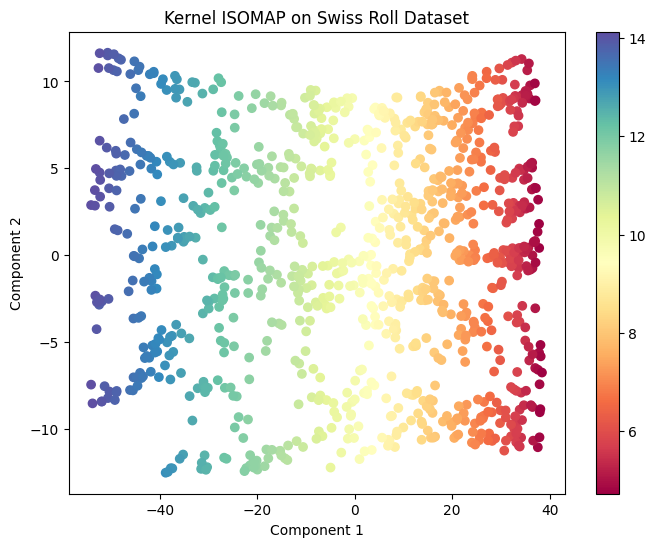

In [14]:
import numpy as np
from scipy.spatial import distance_matrix
from scipy.linalg import eigh
from sklearn.neighbors import NearestNeighbors
from scipy.sparse.csgraph import shortest_path
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll

def nearest_neighbor_graph(X, n_neighbors):
    nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(X)
    distances, indices = nbrs.kneighbors(X)
    
    # Create the graph
    n_samples = X.shape[0]
    graph = np.full((n_samples, n_samples), np.inf)
    
    for i in range(n_samples):
        for j in range(n_neighbors):
            graph[i, indices[i, j]] = distances[i, j]
            graph[indices[i, j], i] = distances[i, j]
    
    return graph

def compute_geodesic_distances(graph):
    return shortest_path(graph, method='auto', directed=False)

def center_distance_matrix(D):
    n = D.shape[0]
    H = np.eye(n) - (1/n) * np.ones((n, n))
    K = -0.5 * H @ (D ** 2) @ H
    return K

def compute_eigen(K, p):
    eigvals, eigvecs = eigh(K)
    sorted_indices = np.argsort(eigvals)[::-1]
    eigvals = eigvals[sorted_indices]
    eigvecs = eigvecs[:, sorted_indices]
    eigvals = eigvals[:p]
    eigvecs = eigvecs[:, :p]
    return eigvals, eigvecs

def compute_embedding(eigvals, eigvecs):
    Y = eigvecs @ np.diag(np.sqrt(eigvals))
    return Y

def kernel_isomap(X, n_neighbors, p):
    # Step 1: Construct the kNN graph
    graph = nearest_neighbor_graph(X, n_neighbors)
    # Step 2: Compute the geodesic distances
    D_geodesic = compute_geodesic_distances(graph)
    # Step 3: Center the geodesic distance matrix
    K = center_distance_matrix(D_geodesic)
    # Step 4: Compute the top p eigenvalues and eigenvectors
    eigvals, eigvecs = compute_eigen(K, p) 
    # Step 5: Compute the embedding
    Y = compute_embedding(eigvals, eigvecs)
    return Y

# Generate the Swiss roll dataset
n_samples = 1000
X, color = make_swiss_roll(n_samples=n_samples, noise=0.05,random_state=48)
# Apply Kernel ISOMAP
n_neighbors = 10
p = 10
Y = kernel_isomap(X, n_neighbors, p)
# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Kernel ISOMAP on Swiss Roll Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar()
plt.show()


### References
1. Ghojogh, B., Crowley, M., Karray, F., & Ghodsi, A. (2023). Elements of Dimensionality Reduction and Manifold Learning. Springer
2. https://scikit-learn.org/1.5/modules/manifold.html
